In [121]:
from sklearn import svm,metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rcParams['font.family']='Malgun Gothic'  #한글설정
matplotlib.rcParams['font.size']= 10  #글자크기
matplotlib.rcParams['axes.unicode_minus'] = False

In [122]:
# [ 도미 ]
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0,
33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
# [ 빙어 ]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


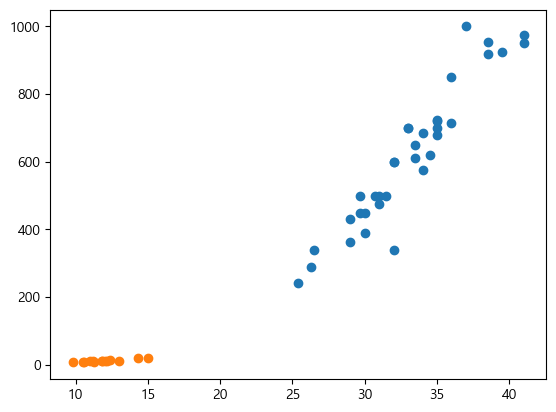

In [123]:
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)

In [ ]:
train_input= [datas[i] for i in idx[:35]]
test_input=[datas[i] for i in idx[35:]]
train_target =[results[i] for i in idx[:35]]
test_target = [results[i] for i in idx[35:]]

In [145]:
df_train =pd.DataFrame(train_input)
df_train.head(1)
df_test =pd.DataFrame(test_input)
df_test.head(1)

,0,1
0,33.5,610.0


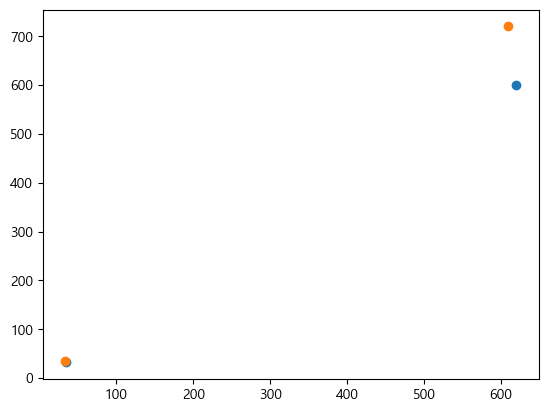

In [148]:
plt.scatter(train_input[0],train_input[1])
plt.scatter(test_input[0],test_input[1])

In [124]:
len(bream_length) # 도미데이터  -35
len(smelt_length)  # 빙어데이터  -14


14

In [147]:
### length -> 합치기 ( bream_length,smelt_length)
### weight -> 합치기(bream_weight, smelt_weight)
length=bream_length+smelt_length
weight=bream_weight+smelt_weight
len(length)   #49개
len(weight)
results = [1]*35 +[0]*14   #1: 도미, 0:빙어
# ## datas = length, weight 합치기

#zip() 반복해서 각각 list데이터를 1개씩 뽑아서 전달해줌.
# datas=[[l,w,r] for l,w,r in zip(length,weight,results)]
# datas
df=pd.DataFrame(datas)

datas=[[l,w] for l,w in zip(length,weight)]
datas
results

## 개수 : 49개

##train_input, test_input, 
##train_target, test_target

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [126]:

### length -> 합치기 (bream_length,smelt_length)
### weight -> 합치기 (bream_weight,smelt_weight)
### 도미 : 1, 빙어 : 0
### results = [1] * 35, [0] * 14
### datas = [ length, weight,results ] 합치기
### [ [ length,weight ] , [ length,weight ] , [ length,weight ] , [ ] , ....     ]
### 개수 : 49개
### train_input,test_input,
### train_target,test_target

In [127]:
len(datas)

49

In [128]:
##datas, results 49개를
# 파이썬 random함수를 사용해서 49개 중 35개 데이터는 train_input, train_target
# 14개는 test_input, test_target
# 출력하시오.

In [ ]:
idx=[i for i in range(49)]
random.shuffle(idx)
idx

In [138]:
#dataFrame사용하지 않고, for문을 사용해서 35,14개를 분리해서 출력하시오.
a=[datas[i] for i in idx[:35]]
a

[[34.5, 620.0],
 [32.0, 600.0],
 [26.5, 340.0],
 [13.0, 12.2],
 [15.0, 19.9],
 [33.5, 650.0],
 [11.2, 9.8],
 [29.0, 363.0],
 [29.0, 430.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [31.0, 475.0],
 [12.0, 9.8],
 [39.5, 925.0],
 [34.0, 685.0],
 [11.8, 10.0],
 [31.0, 500.0],
 [9.8, 6.7],
 [33.0, 700.0],
 [29.7, 450.0],
 [10.6, 7.0],
 [37.0, 1000.0],
 [30.0, 450.0],
 [10.5, 7.5],
 [38.5, 920.0],
 [30.7, 500.0],
 [33.0, 700.0],
 [11.8, 9.9],
 [41.0, 950.0],
 [11.0, 9.7],
 [14.3, 19.7],
 [12.4, 13.4],
 [38.5, 955.0],
 [29.7, 500.0],
 [36.0, 714.0]]

In [130]:
# len(df.iloc[idx[:35],:])  #35개
# df.iloc[idx[:35],:]


# len(df.iloc[idx[35:],:])  #14개



In [131]:
#데이터 전처리
# train_input = df.iloc[idx[:35],:-1]
# test_input = df.iloc[idx[35:],:-1]
# train_target = df.iloc[idx[:35],2]
# test_target = df.iloc[idx[35:],2]


In [139]:
#dataFrame사용하지 않고, for문을 사용해서 35,14개를 분리해서 출력하시오.

train_input= [datas[i] for i in idx[:35]]
test_input=[datas[i] for i in idx[35:]]
train_target =[results[i] for i in idx[:35]]
test_target = [results[i] for i in idx[35:]]

In [140]:
len(test_input)

14

In [134]:
# r=results[:35]

# datas=[[l,w,r] for l,w,r in zip(length,weight,r)]
# len(datas)

# r1=results[35:]
# datas=[[l,w,r1] for l,w,r1 in zip(length,weight,r1)]
# len(datas)

In [135]:
datas

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [155]:
train_input= [datas[i] for i in idx[:35]]
test_input=[datas[i] for i in idx[35:]]
train_target =[results[i] for i in idx[:35]]
test_target = [results[i] for i in idx[35:]]

In [154]:
df_train =pd.DataFrame(train_input)
df_train.head(1)
df_test =pd.DataFrame(test_input)
df_test.head(1)

,0,1
0,33.5,610.0


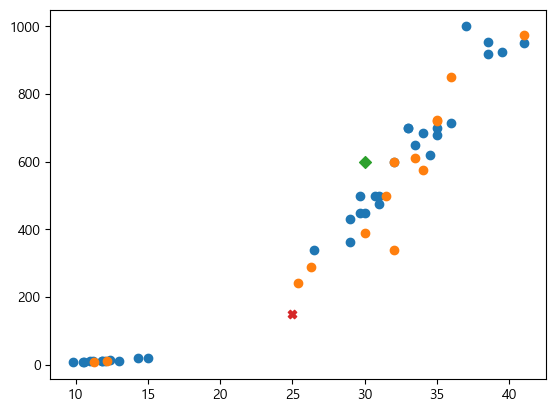

In [173]:
### 도미 : 1, 빙어 : 0

plt.scatter(df_train[0],df_train[1])
plt.scatter(df_test[0],df_test[1])
plt.scatter(30,600,marker='D')
plt.scatter(25,150,marker='X')

In [166]:
#데이터 학습하기
from sklearn.neighbors import KNeighborsClassifier
# clf=svm.SVC()
clf=KNeighborsClassifier()
clf.fit(train_input,train_target)

pre=clf.predict(test_input)
score=clf.score(test_input,test_target)
print("예측데이터값: ",pre)
print("정답률: ",score)
                    

예측데이터값:  [1 1 1 0 1 0 1 1 1 1 1 1 1 1]
정답률:  1.0


In [174]:
#train_input 몇번째 index 데이터를 사용했는지 알려줌.
distances,indexs=clf.kneighbors([[25,150]])


In [180]:
df_train.iloc[indexs[0],0]

4     15.0
30    14.3
31    12.4
3     13.0
15    11.8
Name: 0, dtype: float64

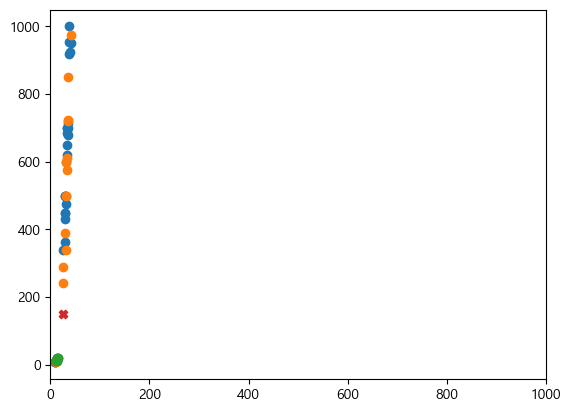

In [182]:
### 도미 : 1, 빙어 : 0
plt.xlim(0,1000)    #x축 y축 수치를 통일시켜서 kneighbor 어디에 더근접한지?
plt.scatter(df_train[0],df_train[1])
plt.scatter(df_test[0],df_test[1])
plt.scatter(df_train.iloc[indexs[0],0],df_train.iloc[indexs[0],1])
plt.scatter(25,150,marker='X')

In [167]:
#길이 30, 무게 600 고기 무엇인지 판단하시오.
#[30,600]
pre=clf.predict([[30,600]])
print("예측데이터값: ",pre)
# score=clf.score(test_input,test_target)
# print("정답률: ",score)

예측데이터값:  [1]


In [171]:
# 길이 25, 무게 150 고기는 무엇인지 맞춰보시오
pre=clf.predict([[25,150]])
print("예측데이터값: ",pre)

예측데이터값:  [0]


In [ ]:
plt.scatter(df_train[0],df_train[1])
plt.scatter(df_test[0],df_test[1])
plt.scatter(30,600,marker='D')
plt.scatter(25,150,marker='^')